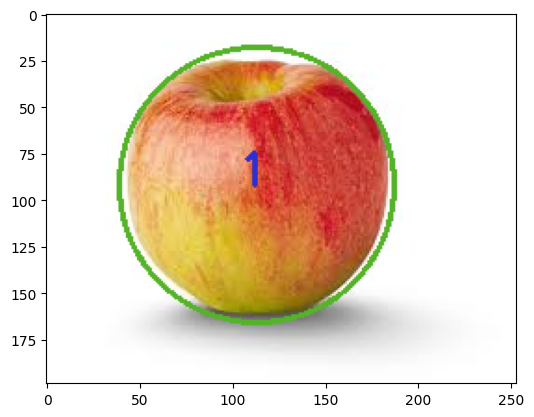

In [7]:
import cv2
from cv2 import typing
import numpy as np
from matplotlib import pyplot as plt

def autoCanny(image: typing.MatLike, sigma: float =0.33)-> typing.MatLike:
  v = np.median(image)
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  edged: typing.MatLike = cv2.Canny(image, lower, upper)
  
  return edged

image: typing.MatLike = cv2.imread(
  filename="img/apple_1.jpeg"
)

image_cp: typing.MatLike = image.copy()
image_blur: typing.MatLike = cv2.GaussianBlur(
  src=image,
  ksize=(5, 5),
  sigmaX=0
)
image_ms: typing.MatLike = cv2.pyrMeanShiftFiltering(
  src=image_blur,
  sp=10,
  sr=90
)

edge: typing.MatLike = autoCanny(
  image=image_ms
)

cnts, _ = cv2.findContours(
  image=edge.copy(),
  mode=cv2.RETR_EXTERNAL,
  method=cv2.CHAIN_APPROX_SIMPLE
)

c_num: int = 0
c_green: typing.Scalar = (41, 179, 85)
c_red: typing.Scalar = (209, 46, 46)

for i, c in enumerate(cnts):
  ( (x, y), r ) = cv2.minEnclosingCircle(c)
  if r > 34:
    c_num += 1
    cv2.circle(
      img=image_cp,
      center=(int(x), int(y)),
      radius=int(r),
      color=c_green,
      thickness=2
    )
    cv2.putText(
      img=image_cp,
      text=f"{c_num}",
      org=(int(x) - 10, int(y)), 
      fontFace=cv2.FONT_HERSHEY_SIMPLEX,
      fontScale=0.8,
      color=c_red,
      thickness=2
    )
  else:
    continue

plt.imshow(
  X=cv2.cvtColor(
    src=image_cp,
    code=cv2.COLOR_BGR2RGB
  )
)
plt.show()